# Importing the neccessary libraries

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm, ttest_ind

from statsmodels.stats.weightstats import ztest

# Reading the data using Pandas

In [284]:
df= pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [285]:
df1=df.head()

# Analysing the number of rows & columns 

In [351]:
df.shape
print(f'Number  of rows :{df.shape[0]} , Number of Columns {df.shape[1]}')

Number  of rows :144867 , Number of Columns 24


In [287]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

# Analysing the structure of dataset

In [288]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [289]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

#we have few null values that can be dropped from the datset

In [290]:
df1

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [291]:
df1=df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp' ,'factor','segment_factor' ])
df1
df_final=df1.dropna(how='any')
df_final

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885


# Aggregating based on [trip_uuid, source_center,destination_center]

In [292]:
df_final['segment_key'] = df_final['trip_uuid'] + df_final['source_center'] + df_final['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df_final[col + '_sum'] = df_final.groupby('segment_key')[col].cumsum()
df_final[[col +'_sum' for col in segment_cols]]

C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_11276\720295267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['segment_key'] = df_final['trip_uuid'] + df_final['source_center'] + df_final['destination_center']
C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_11276\720295267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col + '_sum'] = df_final.groupby('segment_key')[col].cumsum()
C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_11276\720295267.py:6: SettingWithCopyWarning: 
A value is try

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


# Aggregating again based on trip_uuid

In [293]:
agg_data = df_final.groupby('trip_uuid').agg({
    'data': 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
})

In [294]:
agg_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
trip_uuid,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0


In [295]:
agg_data.sort_values(by=['trip_uuid'], ascending=True).reset_index()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 02:28:43.529141,152.0,31.261599,49.0,34.0,44.5639,49.0,35.9560,34.0
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 02:51:27.075797,173.0,19.349008,190.0,24.0,30.0545,190.0,35.4369,36.0
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,105.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0


In [296]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14787 entries, trip-153671041653548748 to trip-153861118270144424
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14787 non-null  object 
 1   trip_creation_time              14787 non-null  object 
 2   route_schedule_uuid             14787 non-null  object 
 3   route_type                      14787 non-null  object 
 4   source_center                   14787 non-null  object 
 5   source_name                     14787 non-null  object 
 6   destination_center              14787 non-null  object 
 7   destination_name                14787 non-null  object 
 8   od_start_time                   14787 non-null  object 
 9   od_end_time                     14787 non-null  object 
 10  start_scan_to_end_scan          14787 non-null  float64
 11  actual_distance_to_destination  14787 non-null  float64
 1

#time data for actual_time,segment_actual_time_sum

In [297]:
time_data=agg_data[['actual_time', 'segment_actual_time_sum']].reset_index(drop=True)

#distance data for actual_distance_to_destination,osrm_distance

In [298]:
dist_data=agg_data[['actual_distance_to_destination', 'osrm_distance']].reset_index(drop=True)

#Osrm time data for osrm_time,segment_osrm_time_sum

In [301]:
osrm_time_data=agg_data[['osrm_time','segment_osrm_time_sum']].reset_index(drop=True)

In [ ]:
agg_data['destination_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)        813
Bangalore_Nelmngla_H (Karnataka)     628
Bhiwandi_Mankoli_HB (Maharashtra)    573
Chandigarh_Mehmdpur_H (Punjab)       431
Hyderabad_Shamshbd_H (Telangana)     400
                                    ... 
Bolpur_WebelDPP_D (West Bengal)        1
Bhandara_KaremDPP_D (Maharashtra)      1
Shirdi_SaiBansi_D (Maharashtra)        1
Sullia_Srirampt_D (Karnataka)          1
Jaipur_Central_D_1 (Rajasthan)         1
Name: destination_name, Length: 951, dtype: int64

# Spliting the source name & destination name to city & state

In [ ]:
def state(x):
  d=x.split('(')[1]
  return d[:-1]
def city(x):
  d=x.split('_')[0]
  return d
agg_data['destination_state'] = agg_data['destination_name'].apply(lambda x: state(x))
agg_data['destination_city']  = agg_data['destination_name'].apply(lambda x: city(x))
agg_data['source_state'] = agg_data['source_name'].apply(lambda x: state(x))
agg_data['source_city']  = agg_data['source_name'].apply(lambda x: city(x))

In [ ]:
agg_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,source_state,source_city
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,...,732.0,329.0,446.5496,728.0,670.6205,534.0,Haryana,Gurgaon,Madhya Pradesh,Bhopal
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,...,47.0,26.0,28.1994,46.0,28.1995,26.0,Karnataka,Chikblapur,Karnataka,Tumkur
trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,...,611.0,212.0,281.2109,608.0,317.7408,231.0,Punjab,Chandigarh,Karnataka,Bangalore
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,...,59.0,15.0,19.6800,59.0,19.8766,16.0,Maharashtra,Mumbai,Maharashtra,Mumbai Hub (Maharashtra)
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,...,131.0,44.0,53.5761,130.0,53.5761,44.0,Karnataka,Bellary,Karnataka,Bellary


In [ ]:
city_state = agg_data[['source_city','source_state','destination_city', 'destination_state']].reset_index(drop=True)

In [329]:
agg_data['od_start_time'] = pd.to_datetime(agg_data['od_start_time'])
agg_data['od_end_time'] = pd.to_datetime(agg_data['od_end_time'])

In [330]:
agg_data['od_timediff_hrs']=((agg_data['od_end_time']- agg_data['od_start_time']).dt.total_seconds()/3600).round(2)
agg_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_timediff_hrs
trip_uuid,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,16.66
trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,2.05
trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,51.66
trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,1.67
trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0,2.53


# Hypothesis testing for actual time & segment actual time 

In [356]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_timediff_hrs']

In [357]:
agg_data[num_cols].describe(include='all')

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_timediff_hrs
count,10274.000000,10274.000000,10274.000000,10274.000000,10274.000000,10274.000000,10274.000000,10274.000000,10274.000000
mean,159.645708,30.714781,83.765330,35.659140,39.390334,82.900526,41.892945,38.335604,2.669162
std,87.796748,18.176642,49.567377,19.211889,22.693506,49.240370,24.251533,21.791770,1.463359
min,22.000000,9.002461,9.000000,7.000000,9.072900,9.000000,9.072900,7.000000,0.380000
25%,94.000000,16.717742,46.000000,20.000000,22.312225,46.000000,23.430225,21.000000,1.580000
50%,139.000000,26.398716,71.000000,32.000000,34.287850,70.000000,36.093450,33.000000,2.320000
75%,206.000000,39.420356,109.000000,49.000000,49.640250,107.000000,54.320000,53.000000,3.450000
max,454.000000,93.038065,265.000000,108.000000,123.086200,262.000000,130.396800,122.000000,7.570000


In [309]:
m1=time_data['actual_time'].mean()
m2=time_data['segment_actual_time_sum'].mean()
print(m1)
print(m2)

251.13437478866572
248.87150875769257


#ho = = m1 is  equal to m2
#h1 = m1 is not equal to m2

In [317]:
t_test_stat, p_value = ttest_ind(time_data['actual_time'], time_data['segment_actual_time_sum'])
print(t_test_stat,p_value)

0.429398823240968 0.6676361383466106


#We accept ho hence the mean of the actual time is similar or  equal to segment_actual_time_ mean

In [318]:
dist_data

,actual_distance_to_destination,osrm_distance
0,383.759164,446.5496
1,24.644021,28.1994
2,237.439610,281.2109
3,17.175274,19.6800
4,41.317614,53.5761
...,...,...
14782,31.261599,44.5639
14783,15.513784,16.0882
14784,19.349008,30.0545
14785,33.673835,40.6080


In [320]:
m1=dist_data['osrm_distance'].mean()
m2=dist_data['actual_distance_to_destination'].mean()
print(m1)
print(m2)

138.2889624332184
111.30022008960626


#ho = = m1  is  equal to m2
#h1 = m1 is not equal to m2

In [321]:
t_test_stat, p_value = ttest_ind(dist_data['osrm_distance'], dist_data['actual_distance_to_destination'])
print(t_test_stat,p_value)

8.426989909290548 3.7053423580473347e-17


#we accept h0 hence mean of osrm distance is equal to actual distance to destination

In [322]:
osrm_time_data


,osrm_time,segment_osrm_time_sum
0,329.0,534.0
1,26.0,26.0
2,212.0,231.0
3,15.0,16.0
4,44.0,44.0
...,...,...
14782,34.0,34.0
14783,12.0,11.0
14784,24.0,36.0
14785,48.0,77.0


In [324]:
m1=osrm_time_data['osrm_time'].mean()
m2=osrm_time_data['segment_osrm_time_sum'].mean()
print(m1)
print(m2)

108.30364509366335
123.76661932778792


In [ ]:
#ho = = m1  is  equal to m2
#h1 = m1 is not equal to m2

In [353]:
t_test_stat, p_value = ttest_ind(osrm_time_data['osrm_time'],osrm_time_data['segment_osrm_time_sum'])
print(t_test_stat,p_value)

-5.578614679012602 2.4456035872091916e-08


#we accept ho hence mean osrm time is equal to segmented osrm time

In [333]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_timediff_hrs']

# Outliers treatement

In [347]:
q1=agg_data[num_cols].quantile(.25)
q3=agg_data[num_cols].quantile(.75)
iqr=q3-q1
low =q1 - 1.5 * iqr
high=q3 + 1.5 * iqr
print(iqr)


start_scan_to_end_scan            142.000000
actual_distance_to_destination     30.135845
actual_time                        86.000000
osrm_time                          35.000000
osrm_distance                      39.583375
segment_actual_time_sum            85.250000
segment_osrm_distance_sum          42.009425
segment_osrm_time_sum              40.000000
od_timediff_hrs                     2.370000
dtype: float64


<Axes: >

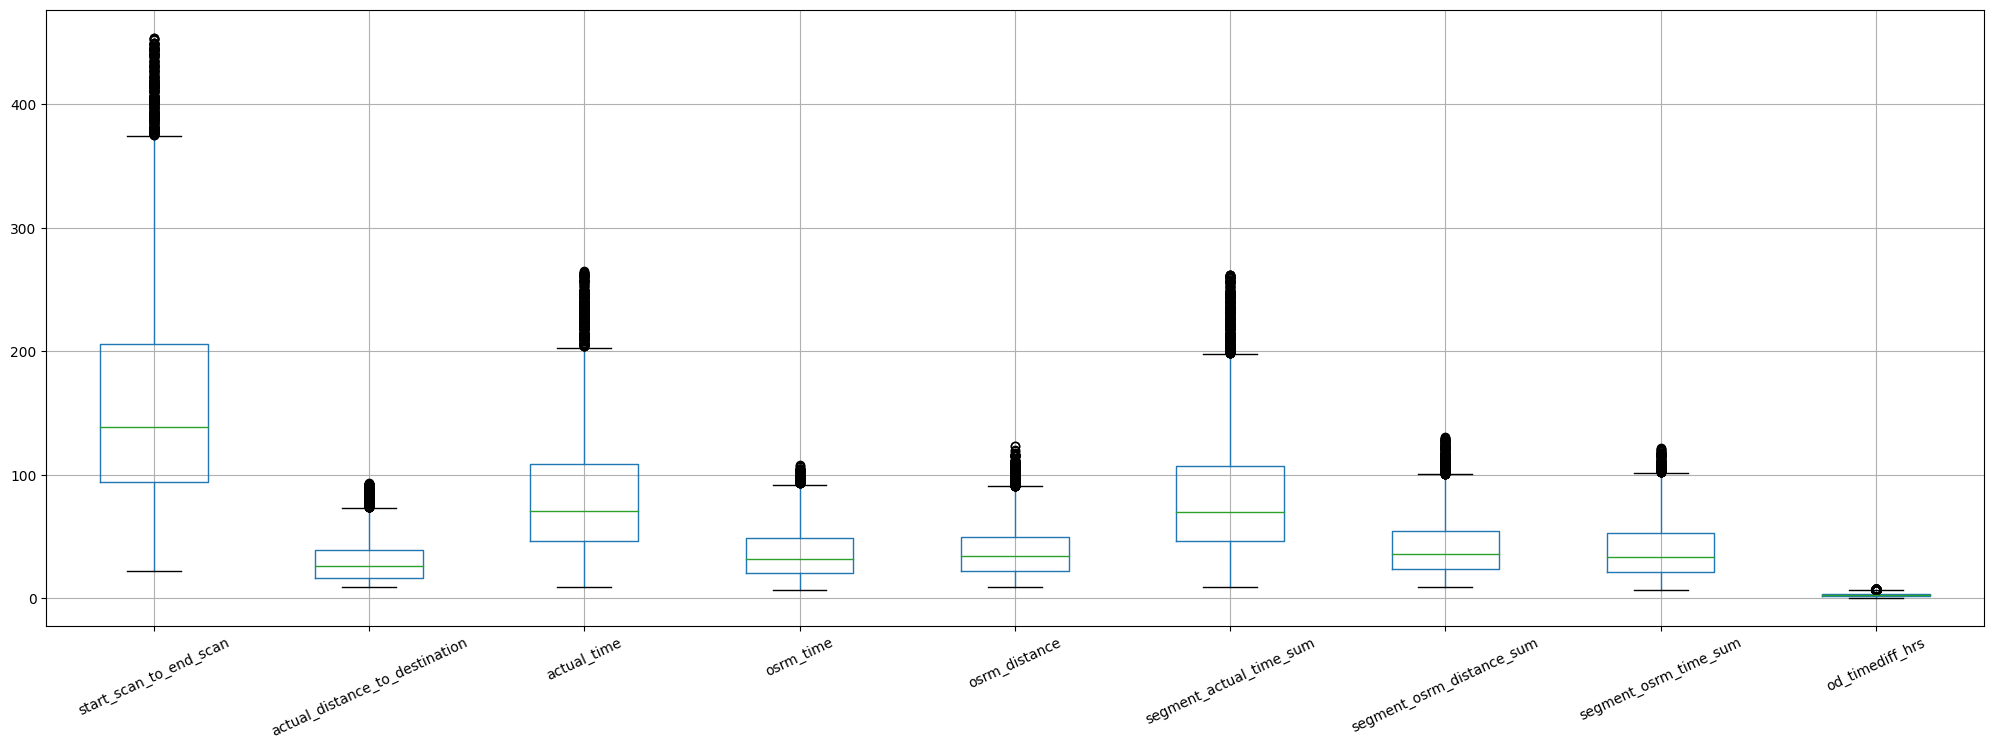

In [355]:
agg_data[num_cols].boxplot(rot=25, figsize=(25,8))

In [348]:
agg_data = agg_data[-((agg_data[num_cols] < low) | (agg_data[num_cols] > high)).any(axis=1)]
agg_data = agg_data.reset_index(drop=True) 
agg_data.shape

(10274, 19)